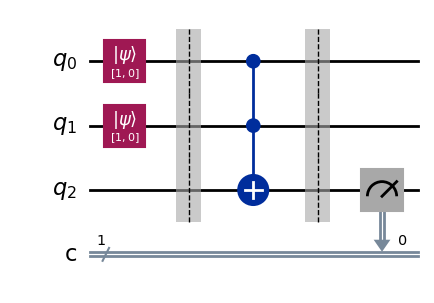

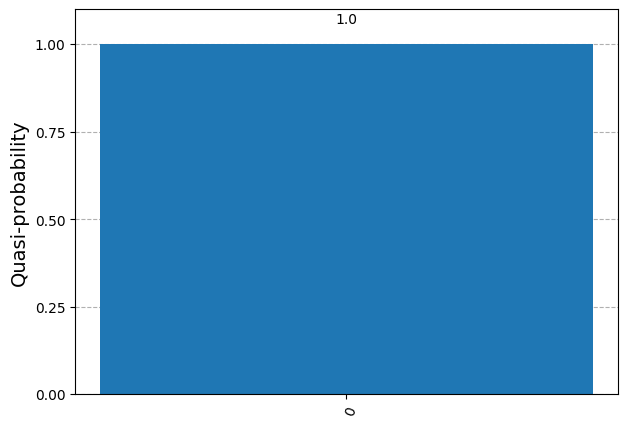

In [24]:
# boolean_gates.ipynb

from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1 - Quantum emulation of a classical Boolean AND Gate

qc = QuantumCircuit(3, 1)
# Change these input values to test the AND gate
qc.initialize([1, 0], 0)
qc.initialize([1, 0], 1)
qc.barrier()
qc.ccx(0, 1, 2)
qc.barrier()
qc.measure(2, 0)

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# Cell 2 - Quantum emulation of a classical Boolean OR Gate

qc = QuantumCircuit(3, 1)
# Change these input values to test the OR gate
qc.initialize([1, 0], 0)
qc.initialize([1, 0], 1)
qc.barrier()
qc.x(0)
qc.x(1)
qc.x(2)
qc.barrier()
qc.ccx(0, 1, 2)
qc.barrier()
qc.x(0)
qc.x(1)
qc.barrier()
qc.measure(2, 0)

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [ ]:
# Cell 3 - Feynman's Full Adder (1985)

qc = QuantumCircuit(4)
qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure_all()

display(qc.draw(output="mpl"))

In [ ]:
# Cell 4 - Generate truth table for Feynman's Full Adder


def full_carry(a, b, c_in):
    qc = QuantumCircuit(4)

    # Initialize input qubits to |1> if necessary
    if a == 1:
        qc.initialize([0, 1], 0)
    if b == 1:
        qc.initialize([0, 1], 1)
    if c_in == 1:
        qc.initialize([0, 1], 2)

    qc.ccx(0, 1, 3)
    qc.cx(0, 1)
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.measure_all()

    backend = AerSimulator()
    qc_transpiled = transpile(qc, backend)
    result = backend.run(qc_transpiled).result()

    counts = result.get_counts(qc)
    return counts


print("|c_in| b | a |  |c_out| s |")
print("|----|---|---|  |-----|---|")

for c_in in [0, 1]:
    for b in [0, 1]:
        for a in [0, 1]:
            result = list(full_carry(a, b, c_in))[0]
            c_out = result[0]  # Qubit 3 in Feynman's Full Adder
            s = result[1]  # Qubit 2 in Feynman's Full Adder
            print(f"|  {c_in} | {b} | {a} |  |  {c_out}  | {s} |")